In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arshiahoseinmardy","key":"299dc93fa503d8da727f0a8dad91b21f"}'}

In [3]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle


In [4]:
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 84% 78.0M/93.0M [00:01<00:00, 40.2MB/s]
100% 93.0M/93.0M [00:01<00:00, 56.2MB/s]


In [6]:
from zipfile import ZipFile
file_name = 'apartment-rental-offers-in-germany.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('immo_data.csv')

In [9]:
df.head(10)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
5,Schleswig_Holstein,142.00,gas_heating,NONE,NaN,False,True,5,4.48,2.4,...,Schleswig_Flensburg_Kreis,Struxdorf,NaN,"helle ebenerdige 2 Zi. Wohnung mit Terrasse, h...",NaN,NaN,NaN,NaN,NaN,Feb20
6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,False,9,1.01,2.4,...,Mittelsachsen_Kreis,Freiberg,Am Bahnhof 14 in Freiberg\nHeizkosten und Warm...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
7,Bremen,88.00,central_heating,ONE_YEAR_FREE,10.0,False,True,5,1.89,2.4,...,Bremen,St._Magnus,+ Komfortabler Bodenbelag: Die Wohnung ist zus...,Rollläden; Warmwasserbereiter; Kellerraum; Gas...,44.00,B,NaN,NaN,NaN,Feb20
8,Baden_Württemberg,110.00,oil_heating,ONE_YEAR_FREE,NaN,False,False,5,3.77,40.0,...,Emmendingen_Kreis,Denzlingen,"Diese ansprechende, lichtdurchflutete DG-Wohnu...","Parkett, Einbauküche, kein Balkon",NaN,E,NaN,NaN,NaN,Feb20
9,Nordrhein_Westfalen,95.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,1.92,40.0,...,Gelsenkirchen,Bulmke_Hüllen,Sie sind auf der Suche nach einer gepflegten u...,In Ihrem neuen Zuhause können Sie nach wenigen...,NaN,NaN,NaN,NaN,NaN,Oct19


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [11]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


**clean Data**

remove not important features

In [12]:
df = df.drop(columns=['scoutId','street','streetPlain','houseNumber','facilities','description'])

In [13]:
df.shape

(268850, 43)

remove data with many null values


In [14]:
df = df.drop(columns = df.columns[((df.isna().sum()/len(df))>0.55)])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   serviceCharge         261941 non-null  float64
 2   heatingType           223994 non-null  object 
 3   telekomTvOffer        236231 non-null  object 
 4   newlyConst            268850 non-null  bool   
 5   balcony               268850 non-null  bool   
 6   picturecount          268850 non-null  int64  
 7   pricetrend            267018 non-null  float64
 8   telekomUploadSpeed    235492 non-null  float64
 9   totalRent             228333 non-null  float64
 10  yearConstructed       211805 non-null  float64
 11  firingTypes           211886 non-null  object 
 12  hasKitchen            268850 non-null  bool   
 13  geo_bln               268850 non-null  object 
 14  cellar                268850 non-null  bool   
 15  

fill null values

In [16]:
  for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
      df[cols] = ((df[cols]-df[cols].mean()) / (df[cols].std()))

In [17]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   serviceCharge         261941 non-null  float64
 2   heatingType           223994 non-null  object 
 3   telekomTvOffer        236231 non-null  object 
 4   newlyConst            268850 non-null  bool   
 5   balcony               268850 non-null  bool   
 6   picturecount          268850 non-null  float64
 7   pricetrend            267018 non-null  float64
 8   telekomUploadSpeed    235492 non-null  float64
 9   totalRent             228333 non-null  float64
 10  yearConstructed       211805 non-null  float64
 11  firingTypes           211886 non-null  object 
 12  hasKitchen            268850 non-null  bool   
 13  geo_bln               268850 non-null  object 
 14  cellar                268850 non-null  bool   
 15  

In [18]:

for cols in df.columns:
  if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
    upperRange = df[cols].mean() + 3* df[cols].std()
    lowerRange = df[cols].mean() - 3* df[cols].std()
    
    indexs = df[(df[cols]>upperRange) | (df[cols]<lowerRange)].index
    df = df.drop(indexs)    


In [19]:
df.shape

(260474, 36)

In [20]:
for cols in df.columns:
  if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
    print('column :',cols)
    print(df[cols].value_counts().head(1))

column : regio1
Nordrhein_Westfalen    61352
Name: regio1, dtype: int64
column : heatingType
central_heating    125067
Name: heatingType, dtype: int64
column : telekomTvOffer
ONE_YEAR_FREE    220545
Name: telekomTvOffer, dtype: int64
column : newlyConst
False    240076
Name: newlyConst, dtype: int64
column : balcony
True    160388
Name: balcony, dtype: int64
column : firingTypes
gas    107564
Name: firingTypes, dtype: int64
column : hasKitchen
False    172551
Name: hasKitchen, dtype: int64
column : geo_bln
Nordrhein_Westfalen    61352
Name: geo_bln, dtype: int64
column : cellar
True    167319
Name: cellar, dtype: int64
column : geo_krs
Leipzig    13439
Name: geo_krs, dtype: int64
column : condition
well_kept    65017
Name: condition, dtype: int64
column : interiorQual
normal    80080
Name: interiorQual, dtype: int64
column : petsAllowed
negotiable    88854
Name: petsAllowed, dtype: int64
column : lift
False    199883
Name: lift, dtype: int64
column : typeOfFlat
apartment    127358
Name

In [21]:
for cols in df.columns:
  if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
    print('col : {} , value : {}'.format(cols,df[cols].value_counts().head(1).index[0]))
    df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

col : regio1 , value : Nordrhein_Westfalen
col : heatingType , value : central_heating
col : telekomTvOffer , value : ONE_YEAR_FREE
col : newlyConst , value : False
col : balcony , value : True
col : firingTypes , value : gas
col : hasKitchen , value : False
col : geo_bln , value : Nordrhein_Westfalen
col : cellar , value : True
col : geo_krs , value : Leipzig
col : condition , value : well_kept
col : interiorQual , value : normal
col : petsAllowed , value : negotiable
col : lift , value : False
col : typeOfFlat , value : apartment
col : garden , value : False
col : regio2 , value : Leipzig
col : regio3 , value : Innenstadt
col : date , value : Feb20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260474 entries, 0 to 268849
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                260474 non-null  object 
 1   serviceCharge         253774 non-null  float64
 2   heatingType           260474 non-null  object 
 3   telekomTvOffer        260474 non-null  object 
 4   newlyConst            260474 non-null  bool   
 5   balcony               260474 non-null  bool   
 6   picturecount          260474 non-null  float64
 7   pricetrend            258685 non-null  float64
 8   telekomUploadSpeed    228216 non-null  float64
 9   totalRent             221016 non-null  float64
 10  yearConstructed       204597 non-null  float64
 11  firingTypes           260474 non-null  object 
 12  hasKitchen            260474 non-null  bool   
 13  geo_bln               260474 non-null  object 
 14  cellar                260474 non-null  bool   
 15  

In [22]:
for cols in df.columns:
  if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
    print('cols: {} , \n {}'.format(cols,df[cols].value_counts()))

cols: regio1 , 
 Nordrhein_Westfalen       61352
Sachsen                   57095
Bayern                    20881
Sachsen_Anhalt            19812
Hessen                    17272
Niedersachsen             16204
Baden_Württemberg         15586
Thüringen                  8260
Rheinland_Pfalz            8169
Berlin                     8050
Brandenburg                6798
Mecklenburg_Vorpommern     6521
Schleswig_Holstein         6505
Hamburg                    3659
Bremen                     2922
Saarland                   1388
Name: regio1, dtype: int64
cols: heatingType , 
 central_heating                   168877
district_heating                   24022
gas_heating                        19371
self_contained_central_heating     18235
floor_heating                      16928
oil_heating                         4871
heat_pump                           2670
combined_heat_and_power_plant       1917
night_storage_heater                1307
wood_pellet_heating                  926
electric_hea

In [23]:

others = list(df['heatingType'].value_counts().tail(6).index)
def edit_heating(x):
    if x in others:
        return 'other'
    else:
        return x

df['heatingType_edit'] = df['heatingType'].apply(edit_heating)
df = df.drop(columns = ['heatingType'])
df['heatingType_edit'].value_counts()*100 / len(df)

central_heating                   64.834494
district_heating                   9.222418
gas_heating                        7.436827
self_contained_central_heating     7.000699
floor_heating                      6.498921
other                              2.111535
oil_heating                        1.870052
heat_pump                          1.025054
Name: heatingType_edit, dtype: float64

In [24]:
 
others = list(df['condition'].value_counts().tail(6).index)
def edit_condition(x):
    if x in others:
        return 'otherCon'
    else:
        return x

df['condition_edit'] = df['condition'].apply(edit_condition)
df = df.drop(columns = ['condition'])
df['condition_edit'].value_counts()*100 / len(df)

well_kept          50.565124
otherCon           21.481607
refurbished        10.049372
fully_renovated     9.814799
first_time_use      8.089099
Name: condition_edit, dtype: float64

In [25]:
 
 

others = list(df['interiorQual'].value_counts().tail(2).index)
def edit_interiorQual(x):
    if x in others:
        return 'otherCon'
    else:
        return x

df['interiorQual_edit'] = df['interiorQual'].apply(edit_interiorQual)
df = df.drop(columns = ['interiorQual'])
df['interiorQual_edit'].value_counts()*100 / len(df)

normal           72.873300
sophisticated    23.752851
otherCon          3.373849
Name: interiorQual_edit, dtype: float64

In [26]:
df.shape

(260474, 36)

In [27]:
df = df.drop(columns=['geo_krs','firingTypes','regio2','regio3','geo_bln'])
df.shape

(260474, 31)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260474 entries, 0 to 268849
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                260474 non-null  object 
 1   serviceCharge         253774 non-null  float64
 2   telekomTvOffer        260474 non-null  object 
 3   newlyConst            260474 non-null  bool   
 4   balcony               260474 non-null  bool   
 5   picturecount          260474 non-null  float64
 6   pricetrend            258685 non-null  float64
 7   telekomUploadSpeed    228216 non-null  float64
 8   totalRent             221016 non-null  float64
 9   yearConstructed       204597 non-null  float64
 10  hasKitchen            260474 non-null  bool   
 11  cellar                260474 non-null  bool   
 12  yearConstructedRange  204597 non-null  float64
 13  baseRent              260474 non-null  float64
 14  livingSpace           260474 non-null  float64
 15  

In [29]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

# impliment linear regression from scratch

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [32]:

y = df['livingSpace'].values
x = df[['serviceCharge','telekomUploadSpeed', 'heatingType_edit']].values

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
x

array([[1.0, 0.0, 0.0, ..., 0.0, 0.3042334345139531, -1.1510530967445929],
       [0.0, 0.0, 0.0, ..., 1.0, -0.0558104054162907,
        -1.1510530967445929],
       [0.0, 0.0, 1.0, ..., 0.0, 0.3366698164896508, -1.6162504825972575],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, 0.22314247957470904, 0.6852523737264511],
       [0.0, 0.0, 0.0, ..., 0.0, 0.07717876068406963,
        -0.0020226216010480616],
       [1.0, 0.0, 0.0, ..., 0.0, 0.5312881083438367,
        -0.0020226216010480616]], dtype=object)

In [34]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.2,random_state=42)

**cost(MSE) and gradient function**

In [ ]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

calculating weights and biases

In [ ]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)

Cost is: 0.007492434892003986
Cost is: 0.006193862518875356
Cost is: 0.00540103789695031
Cost is: 0.004893428307032534
Cost is: 0.004564159702751817
Cost is: 0.004348398772361988
Cost is: 0.0042057540187628775
Cost is: 0.0041106596095858835
Cost is: 0.004046755148355248
Cost is: 0.00400347706099062


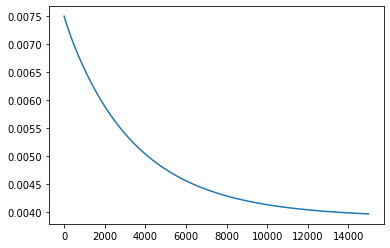

In [ ]:
plt.plot(c)

In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

Calculating the r² accuracy of our model

In [ ]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, Ytest)

0.47018353181017936

# with packages

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
dfPack = df
yPack = dfPack['livingSpace'].values
xPack = dfPack[['serviceCharge','telekomUploadSpeed', 'heatingType_edit']].values
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
xPack = np.array(ct1.fit_transform(xPack))
xPack

array([[1.0, 0.0, 0.0, ..., 0.0, 0.3042334345139531, -1.1510530967445929],
       [0.0, 0.0, 0.0, ..., 1.0, -0.0558104054162907,
        -1.1510530967445929],
       [0.0, 0.0, 1.0, ..., 0.0, 0.3366698164896508, -1.6162504825972575],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, 0.22314247957470904, 0.6852523737264511],
       [0.0, 0.0, 0.0, ..., 0.0, 0.07717876068406963,
        -0.0020226216010480616],
       [1.0, 0.0, 0.0, ..., 0.0, 0.5312881083438367,
        -0.0020226216010480616]], dtype=object)

In [ ]:
XtrainP, XtestP, YtrainP , YtestP = train_test_split( xPack, yPack, test_size = 0.2,random_state=42)
lr=LinearRegression()
lr.fit(XtrainP,YtrainP)
lr.score(XtestP,YtestP)

0.47907796437125305

# use lasso and ridge

In [41]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics


**with same features**

In [97]:
dfPack = df
yPack = dfPack['livingSpace'].values
xPack = dfPack[['serviceCharge','telekomUploadSpeed', 'heatingType_edit']].values
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
xPack = np.array(ct1.fit_transform(xPack))
print(XtrainP.shape)
print(YtrainP.shape)
print(XtestP.shape)
print(YtestP.shape)


(208379, 2)
(208379,)
(52095, 2)
(52095,)


In [98]:
model_lasso = Lasso(alpha=0.1)


model_lasso.fit(XtrainP, YtrainP)
y_predL = model_lasso.predict(XtestP)
print(model_lasso.coef_)
print('lasso reggression score train:', model_lasso.score(XtrainP, YtrainP))
print('lasso reggression R^2: test', metrics.r2_score(YtestP, y_predL))


[ 0. -0.]
lasso reggression score train: 0.0
lasso reggression R^2: test -1.5827197756612676e-05


# Ridge

In [78]:
dfPack = df
yPack = dfPack['livingSpace'].values
xPack = dfPack[['serviceCharge','telekomUploadSpeed', 'heatingType_edit']].values
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
xPack = np.array(ct1.fit_transform(xPack))
XtrainP, XtestP, YtrainP , YtestP = train_test_split( xPack, yPack, test_size = 0.2,random_state=42)
print(XtrainP.shape)
print(YtrainP.shape)
print(XtestP.shape)
print(YtestP.shape)

(208379, 10)
(208379,)
(52095, 10)
(52095,)


In [79]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(XtrainP, YtrainP)
y_predR = model_ridge.predict(XtestP)
print('ridge reggression score train:', model_ridge.score(XtrainP, YtrainP))
print('ridge reggression R^2: test', metrics.r2_score(YtestP, y_predR))

ridge reggression score train: 0.4777821606487328
ridge reggression R^2: test 0.47907799264585327


# regression with Absolute Error

In [35]:
def CostFunctionAbsolute(x,y,w,b):
    cost = (np.sum(abs(((x.dot(w) + b) - y))) / 2)
    return cost

def GradientDescentAbsolute(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunctionAbsolute(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [36]:
w, b, c= GradientDescentAbsolute(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.005,epochs=5000)

Cost is: 9338.40706595592
Cost is: 8426.864014684174
Cost is: 7890.748816498175
Cost is: 7503.62815171316
Cost is: 7224.801152980423
Cost is: 7027.089647785274
Cost is: 6888.216682672915
Cost is: 6790.698324403044
Cost is: 6722.12261382761
Cost is: 6673.402590218215


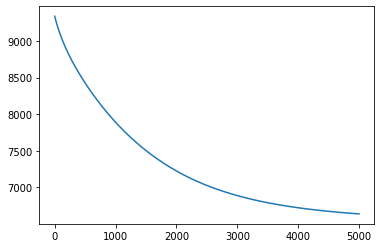

In [37]:
plt.plot(c)

In [38]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(Xtest, w, b)

In [39]:

def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2



In [40]:
r2score(y_pred, Ytest)

0.4626131908010461